In [3]:
# data manipulation and visualisation
library(dplyr,quietly = TRUE)
library(tidyverse,quietly = TRUE)
# hdf5 file manipulation
library(rhdf5)
library(viridis)
library(ggplot2,quietly = TRUE)
library(reshape2,quietly = TRUE)
library(viridis,quietly = TRUE)
library(data.table,quietly = TRUE)
library(xtable,quietly = TRUE)
library(knitr)
library(markdown)
library(stringr)
library(cowplot)
library(patchwork)
source("utils/energy_Util.R")

# the package and the option to make the figures bigger in juptyer/R
library(repr)
options(repr.plot.width=14, repr.plot.height=9)

# read HPF5 and extract RAPL entries

In [20]:

files=read_file_list(path="data/colmet/")
#function to read RAPL data
job_load_rapl_events <- function(file, job_id) {
  jobdata <- h5read(file,
                 paste0("/job_", job_id, "/RAPLstats_default"), 
                 bit64conversion="double");
  return (jobdata)
}
d_all=0
all_rapl_mesurement=0
d_all = data.frame()
c=0
for (file_name in files){
    file_path=paste0(path,file_name)
    tryCatch({
        
      print(file_path)
      jobdata_rapl <- h5read(file_path,"/job_0/RAPLstats_default",bit64conversion="double")
      print("file found")
      c=c+1
      print(c)  
        
      #d_all=c(d_all,jobdata_rapl)
      d_all=rbind(d_all,jobdata_rapl)
        #if (d_all==0){d_all=jobdata_rapl}
      #else{d_all=rbind(d_all,jobdata_rapl)}
      H5close()
      rm(jobdata_rapl)
      gc()
    },
      error = function(e) { 
               print(paste("'Test' dataset not found in ",file_name)) 
               print(e)
               }
      )
     print("********************************************")
}
#d_all <- do.call("rbind",d_all) 

[1] "/home/salah/energy/ciment-dahu/colmet/colmet/dahu.1561469864.hdf5"
[1] "file found"
[1] 1
[1] "********************************************"
[1] "/home/salah/energy/ciment-dahu/colmet/colmet/dahu.1561473004.hdf5"
[1] "file found"
[1] 2
[1] "********************************************"
[1] "/home/salah/energy/ciment-dahu/colmet/colmet/dahu.1561516205.hdf5"
[1] "file found"
[1] 3
[1] "********************************************"
[1] "/home/salah/energy/ciment-dahu/colmet/colmet/dahu.1561559406.hdf5"
[1] "file found"
[1] 4
[1] "********************************************"
[1] "/home/salah/energy/ciment-dahu/colmet/colmet/dahu.1561602609.hdf5"
[1] "file found"
[1] 5
[1] "********************************************"
[1] "/home/salah/energy/ciment-dahu/colmet/colmet/dahu.1561645872.hdf5"
[1] "file found"
[1] 6
[1] "********************************************"
[1] "/home/salah/energy/ciment-dahu/colmet/colmet/dahu.1561689006.hdf5"
[1] "file found"
[1] 7
[1] "************************

In [21]:
d_energy=d_all%>%dplyr::select(hostname,timestamp,
                      energyUJ_0,energyUJ_2,energyUJ_3,energyUJ_5,
                      maxEnergyRangeUJ_0,maxEnergyRangeUJ_2,maxEnergyRangeUJ_3,maxEnergyRangeUJ_5)

d_energy_agg_minutes=d_energy%>%mutate(timestamp_minute=timestamp%/%60)%>%group_by(hostname,timestamp_minute)%>%
  summarise(timestamp=mean(timestamp),
    energyUJ_0=mean(energyUJ_0),energyUJ_2=mean(energyUJ_2),energyUJ_3=mean(energyUJ_3),energyUJ_5=mean(energyUJ_5))

d_energy_agg_minutes=d_energy_agg_minutes %>% 
  rename(
     "pp0/package1"=energyUJ_0 ,
     "DRAM/package1"=energyUJ_2,
     "pp0/package2"=energyUJ_3 ,
     "DRAM/package2"=energyUJ_5 
    )
d_energy_agg_minutes

sample_start=min(d_energy_agg_minutes$timestamp)
sample_end=max(d_energy_agg_minutes$timestamp)


`summarise()` regrouping output by 'hostname' (override with `.groups` argument)



hostname,timestamp_minute,timestamp,pp0/package1,DRAM/package1,pp0/package2,DRAM/package2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bigfoot1,26024506,1561470416,786069,126393,774473,101668
bigfoot1,26024507,1561470448,226862355,38104670,203855598,32374507
bigfoot1,26024508,1561470508,206063107,39043086,238060863,33163885
bigfoot1,26024509,1561470568,222369228,39051084,219928295,33170040
bigfoot1,26024510,1561470628,224497849,38945033,207778577,33087591
bigfoot1,26024511,1561470688,191202402,38770064,204763076,32629018
bigfoot1,26024512,1561470748,187845868,38771513,204633148,32569866
bigfoot1,26024513,1561470808,187458357,38829946,204587591,32520933
bigfoot1,26024514,1561470868,187428664,38766207,204624720,32602568


# Read  job information

In [22]:
d_oar=read_csv("data/oar/job_oar_sample.csv")
names(d_oar)=c("job_id","job_name_oar","cigri_oar","submission_time_oar","start_time_oar","stop_time_oar","walltime_oar","job_user_oar","job_gourp_oar","queue_name_oar","array_id_oar","job_type_oar","reservation","moldable_id","resource_id_oar","assigned_resource_index_oar","host_oar")
d_oar$job_name_oar=NULL
d_oar$assigned_resource_index_oar=NULL
d_oar$job_gourp_oar=NULL
d_oar$reservation=NULL
#data$hostname=str_extract(data$hostname,"[0-9]+")
d_oar$host_oar=str_extract(d_oar$host_oar,"[0-9]+")
d_oar=d_oar%>%filter(!(host_oar %in% c("1","2","3")))

d_oar=d_oar%>%mutate(core_id=(resource_id_oar-(33*32))%%32+1)
d_oar=d_oar%>%mutate(processor=ifelse(core_id<=16,2,1))
d_oar

d_gantt_proc=d_oar%>%group_by(job_id,host_oar,cigri_oar,submission_time_oar,walltime_oar,start_time_oar,stop_time_oar,processor,job_type_oar,job_user_oar)%>%
    arrange(core_id)%>%
    summarise(resource_ids_oar= paste(core_id,collapse=","),
             nb_resources=n(),
             psetmin=min(core_id),psetmax=max(core_id))



 d_gantt_proc=d_gantt_proc%>%mutate(runtime_oar=stop_time_oar-start_time_oar)
 d_gantt_proc=d_gantt_proc%>%ungroup()
 d_gantt_proc

Parsed with column specification:
cols(
  job_id = col_double(),
  job_name = col_character(),
  cigri = col_double(),
  submission_time = col_double(),
  start_time = col_double(),
  stop_time = col_double(),
  walltime = col_character(),
  job_user = col_character(),
  job_group = col_logical(),
  queue_name = col_character(),
  array_id = col_double(),
  job_type = col_character(),
  reservation = col_character(),
  moldable_id = col_double(),
  resource_id = col_double(),
  assigned_resource_index = col_character(),
  host = col_character()
)



job_id,cigri_oar,submission_time_oar,start_time_oar,stop_time_oar,walltime_oar,job_user_oar,queue_name_oar,array_id_oar,job_type_oar,moldable_id,resource_id_oar,host_oar,core_id,processor
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
3858920,0,1561449525,1561449533,1561450582,0:0:120,irnakat,default,3858920,PASSIVE,3859012,32,33,1,2
3858920,0,1561449525,1561449533,1561450582,0:0:120,irnakat,default,3858920,PASSIVE,3859012,3,33,4,2
3858920,0,1561449525,1561449533,1561450582,0:0:120,irnakat,default,3858920,PASSIVE,3859012,9,33,10,2
3858920,0,1561449525,1561449533,1561450582,0:0:120,irnakat,default,3858920,PASSIVE,3859012,15,33,16,2
3858920,0,1561449525,1561449533,1561450582,0:0:120,irnakat,default,3858920,PASSIVE,3859012,28,33,29,1
3858920,0,1561449525,1561449533,1561450582,0:0:120,irnakat,default,3858920,PASSIVE,3859012,20,33,21,1
3858920,0,1561449525,1561449533,1561450582,0:0:120,irnakat,default,3858920,PASSIVE,3859012,29,33,30,1
3858920,0,1561449525,1561449533,1561450582,0:0:120,irnakat,default,3858920,PASSIVE,3859012,18,33,19,1
3858920,0,1561449525,1561449533,1561450582,0:0:120,irnakat,default,3858920,PASSIVE,3859012,19,33,20,1


`summarise()` regrouping output by 'job_id', 'host_oar', 'cigri_oar', 'submission_time_oar', 'walltime_oar', 'start_time_oar', 'stop_time_oar', 'processor', 'job_type_oar' (override with `.groups` argument)



job_id,host_oar,cigri_oar,submission_time_oar,walltime_oar,start_time_oar,stop_time_oar,processor,job_type_oar,job_user_oar,resource_ids_oar,nb_resources,psetmin,psetmax,runtime_oar
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
3858528,37,0,1561400697,00:30:0,1561400698,1561400771,2,PASSIVE,jmougino,2,1,2,2,73
3858529,42,0,1561400700,24:00:0,1561400708,1561400750,2,PASSIVE,jmougino,2,1,2,2,42
3858530,42,0,1561400707,01:00:0,1561400708,1561401025,2,PASSIVE,jmougino,3,1,3,3,317
3858531,43,0,1561400709,01:00:0,1561400715,1561400910,2,PASSIVE,jmougino,2,1,2,2,195
3858532,43,0,1561400711,01:00:0,1561400715,1561401235,2,PASSIVE,jmougino,3,1,3,3,520
3858533,43,0,1561400713,01:00:0,1561400715,1561400910,2,PASSIVE,jmougino,4,1,4,4,195
3858534,48,0,1561400715,01:00:0,1561400721,1561400732,1,PASSIVE,jmougino,22,1,22,22,11
3858535,48,0,1561400718,01:00:0,1561400721,1561400748,1,PASSIVE,jmougino,23,1,23,23,27
3858536,48,0,1561400720,01:00:0,1561400721,1561400748,1,PASSIVE,jmougino,24,1,24,24,27


In [23]:
draw_gantt_oar_proc <- function(workload="",title ="??",start_sample,end_sample) {
  
  
  # we read the workload 
  #print(workload)
  
  
  # Start ploting
  a= workload  %>%
    ggplot(aes( xmin=start_time_oar,
                ymin=psetmin,
                ymax=psetmax + 0.9,
                xmax=stop_time_oar,
                # here it will set the alpha globaly
                #alpha=job_id,
                fill=as.character(cigri_oar)
                )
           )  + #scale_fill_viridis(discrete=T) +
    # This draw the rectangles
    geom_rect(color="black", size=0.1) +theme(legend.position = "none")+ labs(fill='cigri id') +
    # And we add the labels of the job id
    geom_text(aes(x=start_time_oar +(stop_time_oar-start_time_oar)/2, # size=stretch,
                  y=psetmin+((psetmax-psetmin)/2)+0.5,
                  label=paste(job_id, "")), alpha=1,check_overlap = TRUE) + theme(axis.title.x=element_blank())+
    
    #xlim(sample_start-20000,sample_end+20000)+
    xlim(start_sample,end_sample)+#facet_wrap(~processor)+
    ylab("resources") + xlab("time (in seconds)") #+ggtitle(title)
  return(a)
}

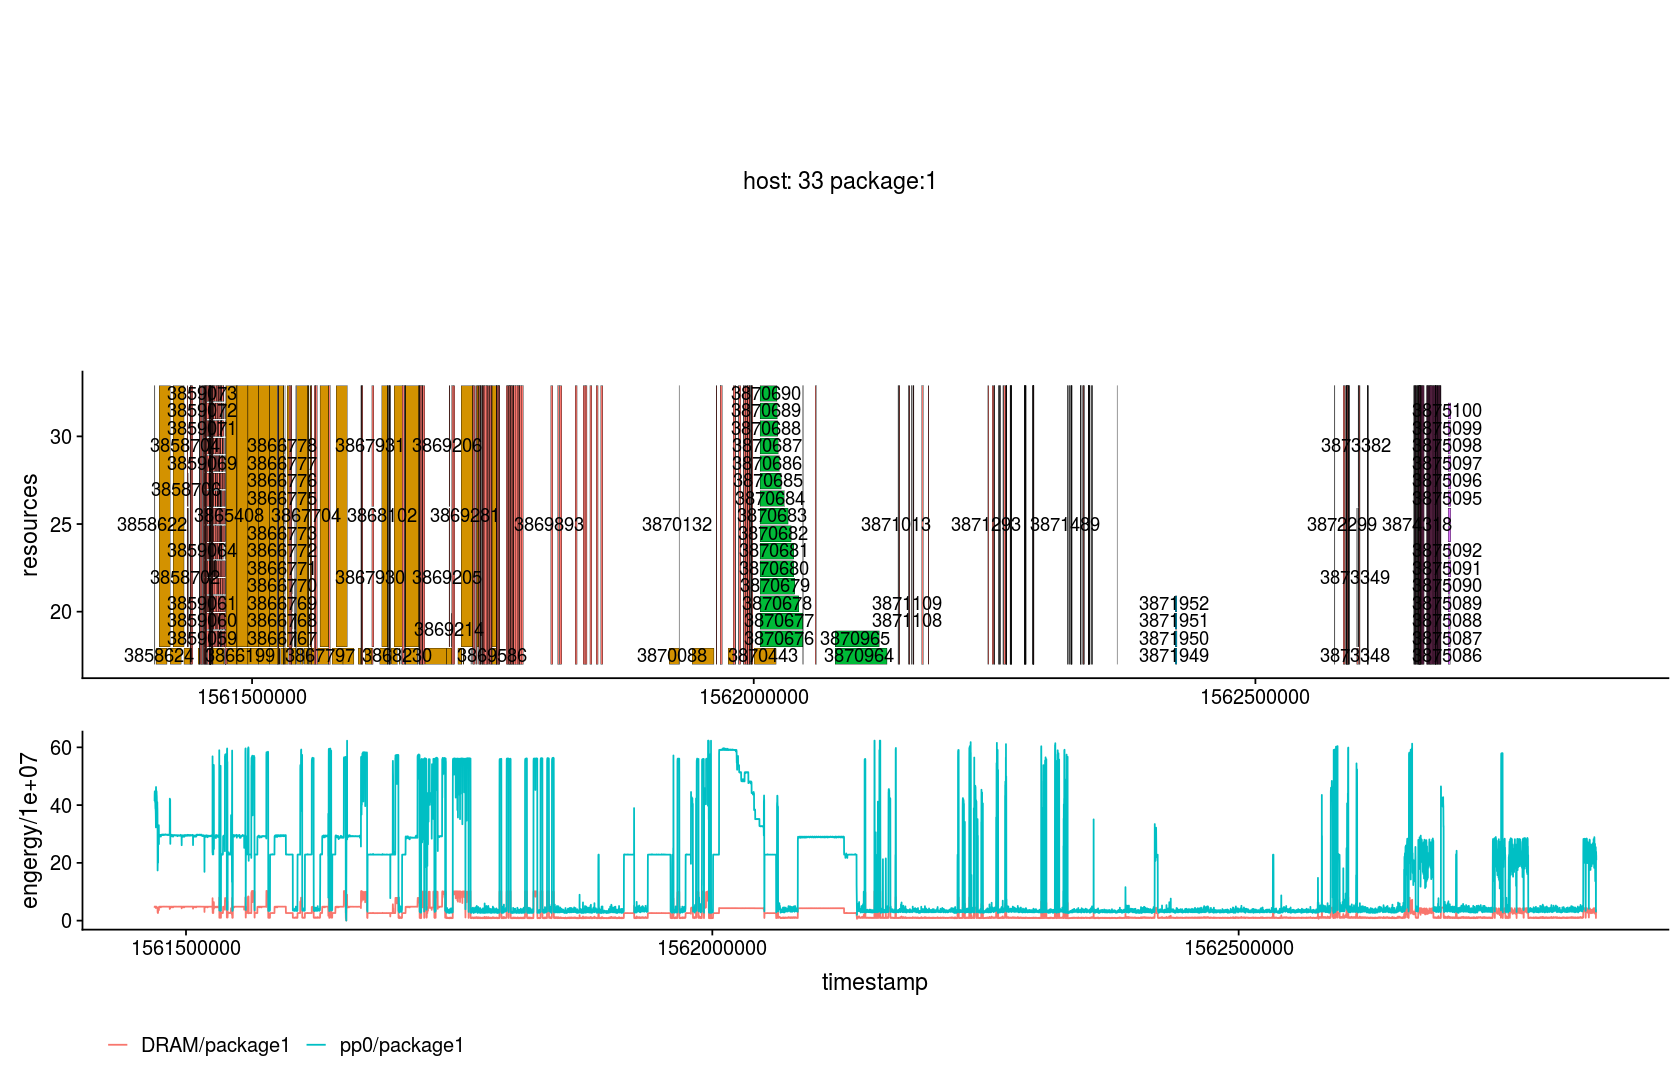

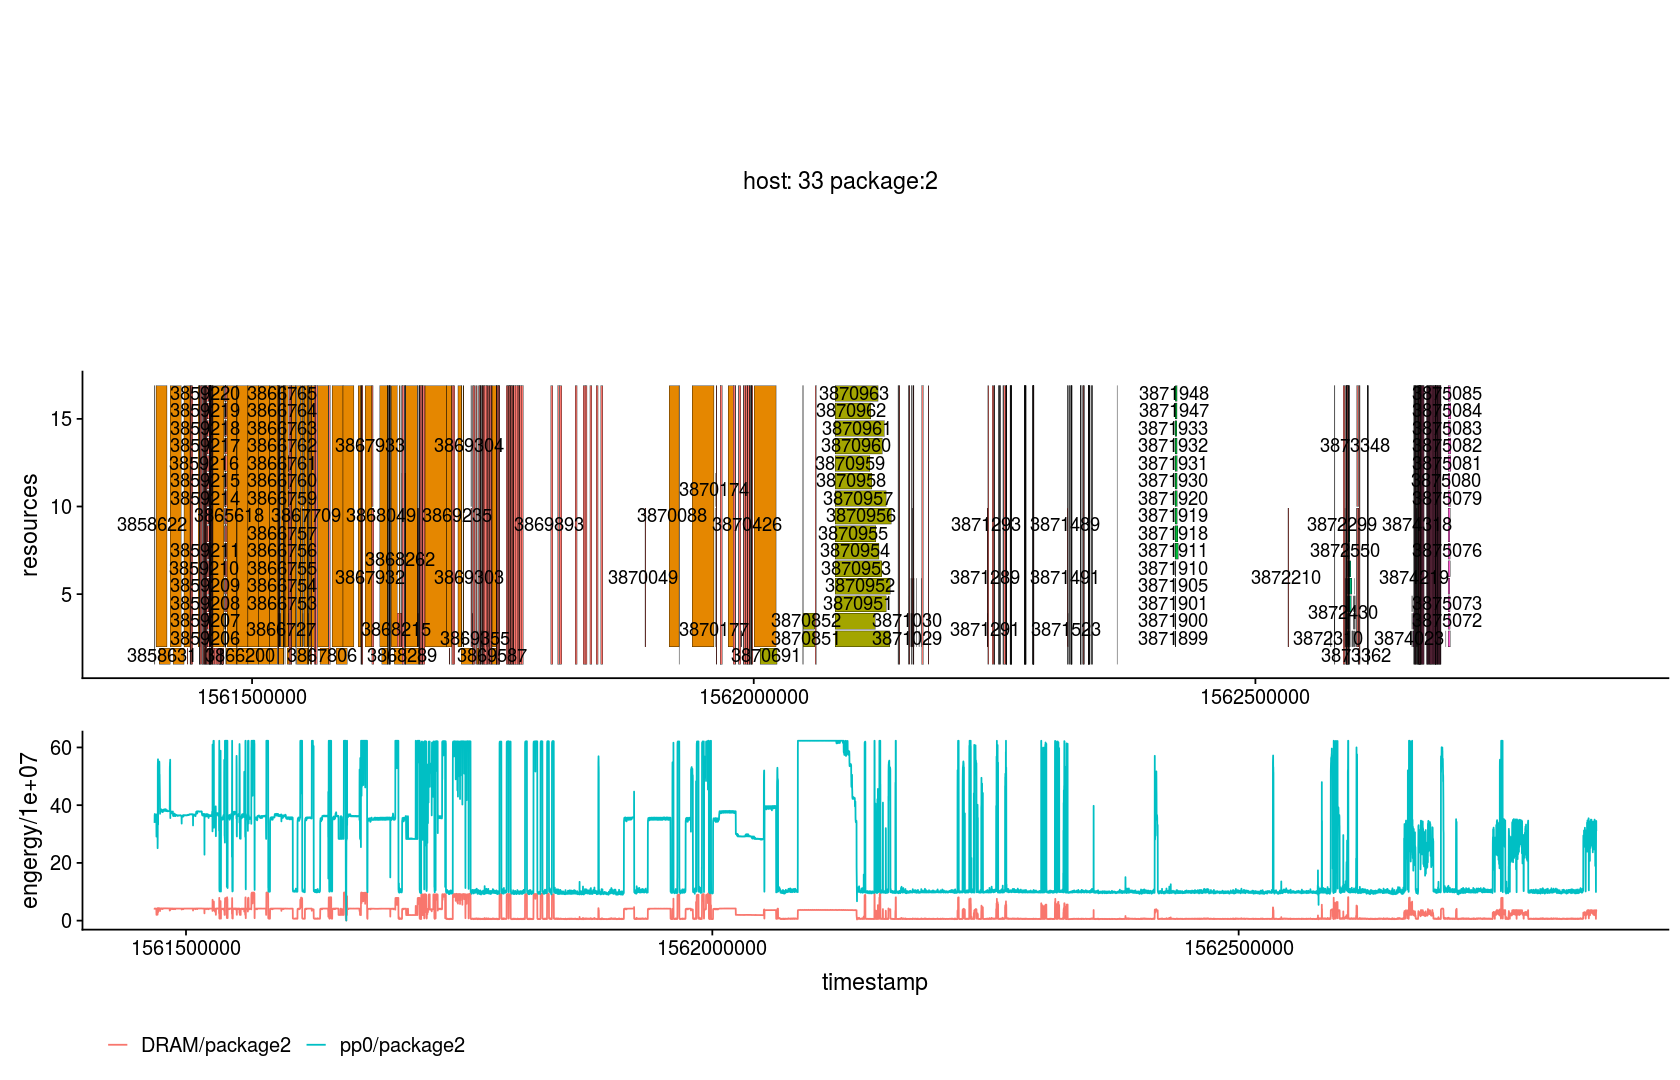

In [28]:
d_energy_visu=gather(d_energy_agg_minutes, key = "package_name", value = "engergy",
       `pp0/package1`,`DRAM/package1`,`pp0/package2`,`DRAM/package2`)

for (i in 33:33){
  
  for (pack_name in 1:2){
    tryCatch({ 
          
            
          
            host_id=as.character(i)
              title <- ggdraw() + draw_label(paste0("host: ",host_id, " package:",pack_name))
              
              d_machine_energy= d_energy_visu%>%
                filter(hostname== paste0("dahu",host_id )& package_name %in% c( paste0("pp0/package",as.character(pack_name)),c( paste0("DRAM/package",as.character(pack_name)) ) ) ) 
              d_workload=d_gantt_proc%>%filter(host_oar== i & processor ==pack_name)
              d_study=d_workload
              #d_workload=d_study%>%filter(job_id==3873447)
              #print(d_workload)
              start_sample=min(min(d_machine_energy$timestamp), min(d_workload$start_time_oar))
              end_sample=max(max(d_machine_energy$timestamp), max(d_workload$stop_time_oar))

              f1=ggplot(data =d_machine_energy)+
                geom_line(aes(x = timestamp,y=engergy/10000000,color=package_name))+
                theme(legend.position = 'bottom',legend.title = element_blank())#+scale_x_continuous(trans = transform_x_to_date)
              
              f3=draw_gantt_oar_proc(workload =d_workload,title = "OAR" ,start_sample,end_sample)
              print(plot_grid(title,f3,f1,ncol = 1))#+ggsave(file_name,height = 8,width = 13) )
      },
                      error = function(e) { 
                               print(paste("error in visualisation ",host_id) )
                               print(e)
                               }
            )
  
  }
}